# Identifiability

In [3]:
import json
import os
import pandas as pd
import seaborn as sns

In [4]:
if os.path.exists("results.json"):
    with open("results.json", 'r') as fp:
        results = json.load(fp)
else:
    from identifiability import get_results

    with open("pmDAGs.json", 'r') as fp:
        data = json.load(fp)

    results = get_results(data)

    with open('results.json', 'w') as fp:
        json.dump(results, fp)

Working on 'backdoor'
Experiment 1
iteration=0          loss=1.5989          average effective distance=1.1011          KL div=0.01431        
iteration=240        loss=1.2854          average effective distance=0.89748         KL div=0.02026        
iteration=480        loss=1.0162          average effective distance=0.6622          KL div=0.02051        
iteration=720        loss=0.67323         average effective distance=0.42322         KL div=0.016143       
iteration=960        loss=0.31426         average effective distance=0.18785         KL div=0.0083587      
iteration=1200       loss=0.11421         average effective distance=0.039616        KL div=0.0015762      
iteration=1440       loss=0.044028        average effective distance=0.0031482       KL div=6.9737e-05     
iteration=1680       loss=0.016135        average effective distance=0.00012341      KL div=2.9206e-06     
iteration=1920       loss=0.0053037       average effective distance=2.2352e-06      KL div=5.9605e-0

In [9]:
df = pd.DataFrame(columns=['name', 'expr', 'iter', 'loss', 'average effective distance', 'KL div'])

for name, experiments in results.items():
    for expr, iterations in experiments.items():
        for i, (iter, errors) in enumerate(iterations.items()):
            df.loc[len(df), df.columns] = name, int(expr), int(iter), \
                                          float(errors['loss']), \
                                          float(errors['KL div']), \
                                          float(errors['average effective distance'])

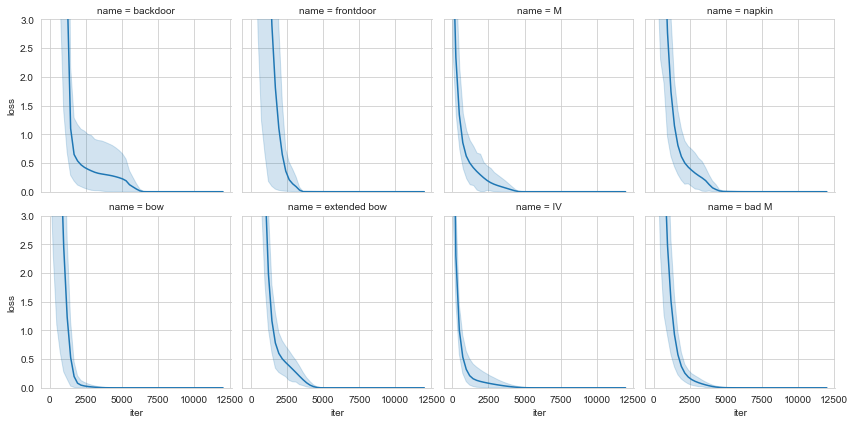

In [6]:
grid = sns.FacetGrid(df, col="name", palette="tab20c", col_wrap=4, height=3)
grid.map(sns.lineplot, "iter", "loss")
grid.set(ylim=(0, 3))

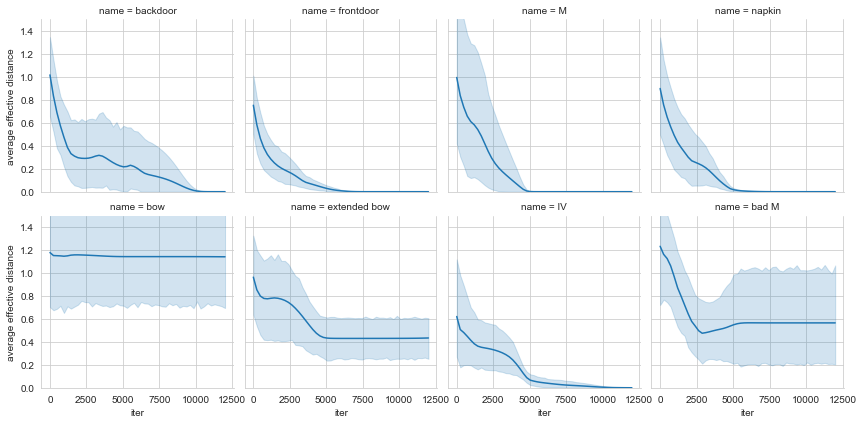

In [7]:
grid = sns.FacetGrid(df, col="name", palette="tab20c", col_wrap=4, height=3)
grid.map(sns.lineplot, "iter", "average effective distance")
grid.set(ylim=(0, 1.5))

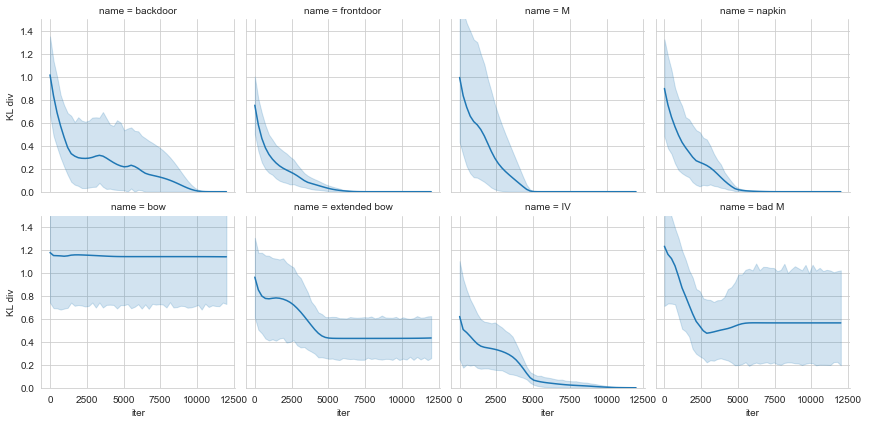

In [10]:
grid = sns.FacetGrid(df, col="name", palette="tab20c", col_wrap=4, height=3)
grid.map(sns.lineplot, "iter", "KL div")
grid.set(ylim=(0, 1.5))